<a href="https://colab.research.google.com/github/AdrianNael/Analisa-Sentimen-KRL-Commuter-Line-Metode-Naive-Bayes-Support-Vector-Machine/blob/main/Analisa_Sentimen_KRL_Commuter_Line_Metode_Naive_Bayes_%26_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Preparing Dataset***

In [ ]:
import pandas as pd
import numpy as np
tweet = pd.read_csv("crawling_data_fix.csv")
tweet.head()

,conversation_id_str,created_at,favorite_count,Text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.774840e+18,Tue Apr 02 02:45:54 +0000 2024,0,@JNLBotolPlastik Selamat pagi kak dapat kami i...,1.774990e+18,NaN,JNLBotolPlastik,in,NaN,0,0,0,https://twitter.com/CommuterLine/status/177499...,3.419872e+08,CommuterLine
1,1.774920e+18,Mon Apr 01 22:10:46 +0000 2024,0,@douchi_xx Selamat pagi kak. Dapat kami sampai...,1.774920e+18,https://pbs.twimg.com/media/GKHKRm1bIAAsj5A.jpg,douchi_xx,in,NaN,0,0,0,https://twitter.com/CommuterLine/status/177492...,3.419872e+08,CommuterLine
2,1.774480e+18,Sun Mar 31 17:59:34 +0000 2024,0,@Anda89899 Selamat pagi Kak. Kami informasikan...,1.774500e+18,NaN,Anda89899,in,NaN,0,0,0,https://twitter.com/CommuterLine/status/177449...,3.419872e+08,CommuterLine
3,1.774440e+18,Sun Mar 31 13:59:46 +0000 2024,1,Bukan orkay tp krn kelasku pagi terus jd mau g...,1.774440e+18,NaN,NaN,in,باتافيا,0,0,1,https://twitter.com/chbikke/status/17744364261...,1.291490e+18,chbikke
4,1.773890e+18,Sat Mar 30 21:05:05 +0000 2024,0,@kittenclaay Dulu banyak itu di Jakarta di KRL...,1.774180e+18,NaN,kittenclaay,in,NaN,0,0,0,https://twitter.com/LazuardiOsado/status/17741...,1.499800e+18,LazuardiOsado


<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 1001
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    999 non-null    object
dtypes: object(1)
memory usage: 15.6+ KB


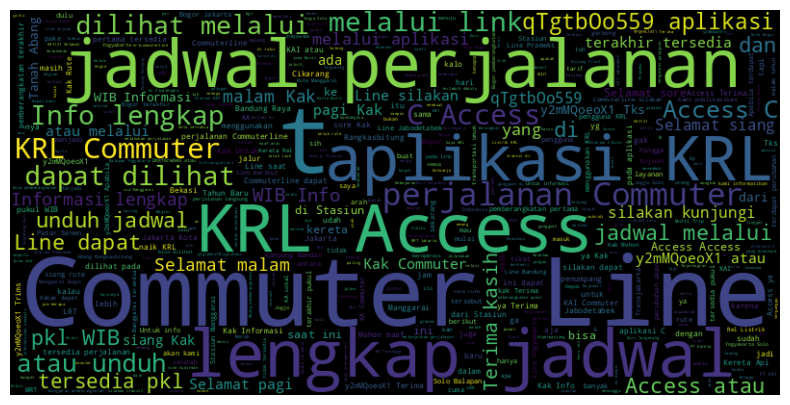

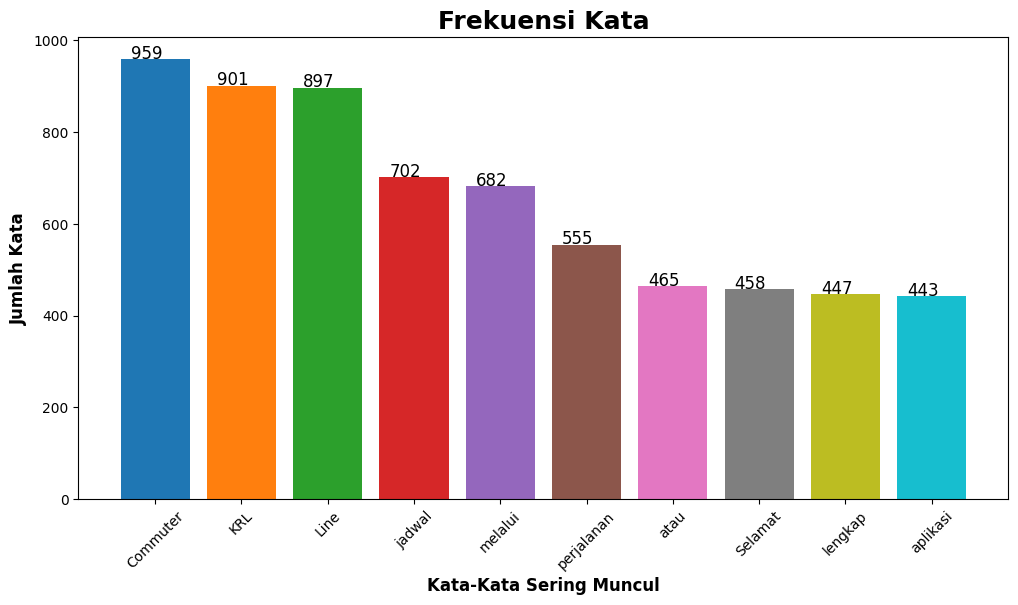

In [ ]:
df= tweet.drop(columns=['user_id_str','retweet_count','reply_count','quote_count','location','lang','tweet_url','username','in_reply_to_screen_name','conversation_id_str','created_at','favorite_count','id_str','image_url'])
df.head()
df.drop_duplicates(subset ="Text", keep = 'first', inplace = True)
df.info()
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Mengisi nilai NaN dengan string kosong ('')
df['Text'] = df['Text'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['Text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["Text"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')



# ***Tahapan Modify/ Pembersihan Dataset***

In [ ]:
!pip install reportlab
import pandas as pd
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from IPython.display import display, clear_output, FileLink
import tempfile
import datetime
import base64
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import ipywidgets as widgets
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.units import inch
import os
from google.colab import files

import locale


# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the tweet dataset
tweet = pd.read_csv("crawling_data_fix.csv")

# Menambahkan kolom panjang asli tweet
tweet['original_length'] = tweet['Text'].apply(len)

# Case Folding
tweet['Text Case Folding'] = tweet['Text'].str.lower()

# Function to remove special characters from tweets
def remove_tweet_special(text):
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
    return text.replace("http://", " ").replace("https://", " ")

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_tweet_special)

# Function to remove numbers
def remove_number(text):
    return re.sub(r"\d+", "", text)

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_number)

# Function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_punctuation)

# Function to remove leading and trailing whitespaces
def remove_whitespace_LT(text):
    return text.strip()

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_whitespace_LT)

# Function to remove multiple whitespaces
def remove_whitespace_multiple(text):
    return re.sub('\s+', ' ', text)

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_whitespace_multiple)

# Function to remove single characters
def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_single_char)

# Tokenizing using NLTK
def word_tokenize_wrapper(text):
    return word_tokenize(text)

tweet['Text Tokenizing'] = tweet['Text Case Folding'].apply(word_tokenize_wrapper)

# Load normalization dictionary from Excel
normalizad_word = pd.read_excel("kamuskatabaku.xlsx")
normalizad_word_dict = {row[0]: row[1] for index, row in normalizad_word.iterrows()}

# Function to normalize terms
def normalized_term(document):
    return [normalizad_word_dict.get(term, term) for term in document]

tweet['Text Normalization'] = tweet['Text Tokenizing'].apply(normalized_term)

# Load Indonesian stopwords
list_stopwords = stopwords.words('indonesian')

# Manually add more stopwords
additional_stopwords = ["yg", "dg", "rt", "dgn", "ny", 'klo', 'kalo', 'amp', 'biar', 'bikin', 'bilang',
                        'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                        'jd', 'jgn', 'sdh', 'aja', 'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt', '&amp',
                        'yah', 'sdgkan', 'sdg', 'emg', 'sm', 'pls', 'mlu', 'ken', 'allah', 'brb', 'btw',
                        'b/c', 'cod', 'cmiiw', 'fyi', 'gg', 'ggwp', 'idk', 'ikr', 'lol', 'ootd', 'lmao',
                        'oot', 'pap', 'otw', 'tfl', 'vc', 'ygy']

list_stopwords.extend(additional_stopwords)

# Add stopwords from a text file
txt_stopword = pd.read_csv("stopwordbahasa.txt", names=["stopwords"], header=None)
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# Convert list to set
list_stopwords = set(list_stopwords)

# Function to remove stopwords
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

tweet['Text Stop Removal'] = tweet['Text Normalization'].apply(stopwords_removal)

# Import Sastrawi package for stemming
!pip install Sastrawi
!pip install swifter

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Function to stem terms
def stemmed_wrapper(term):
    return stemmer.stem(term)

# Create term dictionary for stemming
term_dict = {}

for document in tweet['Text Stop Removal']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

# Stem each term
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)

# Apply stemmed terms to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

tweet['Text Stemming'] = tweet['Text Stop Removal'].swifter.apply(get_stemmed_term)

tweet['Tweet Setelah Preprocessing'] = tweet['Text Stemming'].apply(lambda x: ' '.join(x))

# Save the final result to CSV
tweet.to_csv('processed_tweets.csv', index=False)

# Load processed tweet data
tweet = pd.read_csv("processed_tweets.csv")

def translate_to_indonesian(date_obj):
    days = {
        "Monday": "Senin",
        "Tuesday": "Selasa",
        "Wednesday": "Rabu",
        "Thursday": "Kamis",
        "Friday": "Jumat",
        "Saturday": "Sabtu",
        "Sunday": "Minggu"
    }

    months = {
        "January": "Januari",
        "February": "Februari",
        "March": "Maret",
        "April": "April",
        "May": "Mei",
        "June": "Juni",
        "July": "Juli",
        "August": "Agustus",
        "September": "September",
        "October": "Oktober",
        "November": "November",
        "December": "Desember"
    }

    day_name = days[date_obj.strftime("%A")]
    day = date_obj.strftime("%d")
    month_name = months[date_obj.strftime("%B")]
    year = date_obj.strftime("%Y")

    return f"{day_name} {day} - {month_name} - {year}"

now = datetime.datetime.now()
formatted_date = translate_to_indonesian(now)
def save_and_download_plot(fig, title):
    buffer = BytesIO()
    fig.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    img = plt.imread(buffer)

    # Create a new figure for adding header and footer
    fig_with_header_footer = plt.figure(figsize=(img.shape[1] / 100, img.shape[0] / 100), dpi=100)
    ax = fig_with_header_footer.add_subplot(111)
    ax.imshow(img)
    ax.axis('off')

    # Add header
    header_text = "LAPORAN"
    ax.text(0.5, 1.05, header_text, ha='center', va='center', fontsize=14, fontweight='bold', transform=ax.transAxes)

    # Add footer
    footer_text = "Adrian Nathanael Kalalo - {}".format(formatted_date)
    ax.text(0.5, -0.1, footer_text, ha='center', va='top', fontsize=10, transform=ax.transAxes)

    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.show()

    file_name = f"{title}.png"
    with open(file_name, 'wb') as f:
        fig_with_header_footer.savefig(f, format='png', bbox_inches='tight')
    files.download(file_name)

# Function to generate and download PDF report
def generate_pdf_report():
    # Create a temporary file for the PDF
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix=".pdf")
    pdf_path = temp_file.name

    # Create a PDF with reportlab
    c = canvas.Canvas(pdf_path, pagesize=letter)
    width, height = letter

    # Add title
    c.setFont("Helvetica-Bold", 16)
    c.drawString(1 * inch, height - 1 * inch, "Laporan Analisis Tweet")

    # Add visualizations
    c.setFont("Helvetica", 12)
    c.drawString(1 * inch, height - 2 * inch, "Word Cloud")
    wordcloud_img = "WordCloud.png"
    c.drawImage(wordcloud_img, 1 * inch, height - 3 * inch, width=5 * inch, height=3 * inch)

    c.drawString(1 * inch, height - 6 * inch, "Distribusi Panjang Tweet")
    length_dist_img = "TweetLengthDistribution.png"
    c.drawImage(length_dist_img, 1 * inch, height - 7 * inch, width=5 * inch, height=3 * inch)

    c.drawString(1 * inch, height - 10 * inch, "20 Kata Teratas")
    top_words_img = "Top20Words.png"
    c.drawImage(top_words_img, 1 * inch, height - 11 * inch, width=5 * inch, height=3 * inch)

    c.save()

    # Download the PDF
    files.download(pdf_path)

# Create a button for generating PDF report
pdf_button = widgets.Button(description="Unduh Laporan PDF")
pdf_button.on_click(lambda _: generate_pdf_report())

# Create sliders for tweet length filtering
length_slider = widgets.IntRangeSlider(
    value=[0, tweet['original_length'].max()],
    min=0,
    max=tweet['original_length'].max(),
    step=1,
    description='Panjang Tweet:',
    continuous_update=False
)

# Function to filter tweets based on length
def filter_by_length(change):
    min_len, max_len = length_slider.value
    filtered_tweet = tweet[(tweet['original_length'] >= min_len) & (tweet['original_length'] <= max_len)]
    display(filtered_tweet[['Text', 'Tweet Setelah Preprocessing']])

# Create a button for applying the filter
filter_button = widgets.Button(description="Terapkan Filter Panjang")
filter_button.on_click(filter_by_length)

# Create a figure for word cloud visualization
def display_wordcloud(button=None):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tweet['Tweet Setelah Preprocessing']))
    fig = plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud")
    plt.show()
    save_and_download_plot(fig, "WordCloud")

# Function to plot tweet length distribution before and after preprocessing
def display_tweet_length_distribution(button=None):
    fig = plt.figure(figsize=(10, 5))
    sns.histplot(tweet['original_length'], kde=False, color='blue', label='Panjang Tweet Asli', bins=30)
    sns.histplot(tweet['Tweet Setelah Preprocessing'].str.split().str.len(), kde=False, color='green', label='Panjang Tweet Setelah Preprocessing', bins=30)
    plt.title("Distribusi Panjang Tweet")
    plt.xlabel("Panjang")
    plt.ylabel("Jumlah")
    plt.legend()
    plt.show()
    save_and_download_plot(fig, "TweetLengthDistribution")

# Function to plot the top 20 words
def display_top_words(button=None):
    text = ' '.join(tweet['Tweet Setelah Preprocessing'])
    counts = Counter(text.split())
    most_common_words = counts.most_common(20)
    words, freq = zip(*most_common_words)

    fig = plt.figure(figsize=(10, 5))
    sns.barplot(x=list(freq), y=list(words))
    plt.title("20 Kata yang Paling Sering Muncul Setelah Preprocessing")
    plt.xlabel("Jumlah")
    plt.ylabel("Kata")
    plt.show()
    save_and_download_plot(fig, "Top20Words")

def display_and_download_tweet(index):
    if 0 <= index < len(tweet):
        selected_tweet = tweet.iloc[index]
        text_original = selected_tweet['Text']
        text_processed = selected_tweet['Tweet Setelah Preprocessing']

        # Display the tweet text
        print(f"Tweet Asli:\n{text_original}\n")
        print(f"Tweet Setelah Preprocessing:\n{text_processed}")

        # Save the tweet to a file
        with open(f"tweet_{index}.txt", "w") as file:
            file.write(f"Tweet Asli:\n{text_original}\n\n")
            file.write(f"Tweet Setelah Preprocessing:\n{text_processed}")

        # Download the tweet file
        files.download(f"tweet_{index}.txt")
    else:
        print("Indeks tweet tidak valid.")

# Creating widgets for buttons
tweet_index_widget = widgets.IntText(description="Indeks Tweet:")
tweet_button = widgets.Button(description="Tampilkan Tweet")
wordcloud_button = widgets.Button(description="Tampilkan Word Cloud dan Unduh")
length_dist_button = widgets.Button(description="Distribusi Panjang Tweet dan Unduh")
top_words_button = widgets.Button(description="20 Kata Teratas dan Unduh")
download_data_button = widgets.Button(description="Unduh Data yang Sudah Diproses")

# Assigning functions to button clicks
tweet_button.on_click(lambda _: display_and_download_tweet(tweet_index_widget.value))
wordcloud_button.on_click(display_wordcloud)
length_dist_button.on_click(display_tweet_length_distribution)
top_words_button.on_click(display_top_words)
download_data_button.on_click(lambda _: files.download('processed_tweets.csv'))

# Create help section
help_text = """
<h2>Panduan Pengguna</h2>
<p><b>Tampilkan Tweet:</b> Menampilkan tweet berdasarkan indeks yang dimasukkan dan opsi untuk melihat teks tweet asli dan yang telah diproses.</p>
<p><b>Word Cloud:</b> Menghasilkan dan menampilkan word cloud dari kata-kata yang paling sering muncul dalam tweet. Anda juga dapat mengunduh gambar word cloud.</p>
<p><b>Distribusi Panjang Tweet:</b> Menampilkan distribusi panjang tweet sebelum dan setelah preprocessing, dan memungkinkan Anda mengunduh grafik distribusi.</p>
<p><b>20 Kata Teratas:</b> Menampilkan 20 kata yang paling sering muncul setelah preprocessing dan memungkinkan Anda mengunduh grafiknya.</p>
<p><b>Unduh Data yang Sudah Diproses:</b> Mengunduh file CSV yang berisi data tweet yang telah diproses.</p>
<p><b>Unduh Laporan PDF:</b> Mengunduh laporan PDF berisi visualisasi dari word cloud, distribusi panjang tweet, dan 20 kata teratas.</p>
"""

help_section = widgets.HTML(value=help_text)

# Creating HTML widgets for header and footer
header = widgets.HTML(value="<h1 style='text-align:center;'>LAPORAN</h1>")
footer = widgets.HTML(
    value=f"<footer style='text-align:left'><h3>Adrian Nathanael Kalalo - {formatted_date}</h3></footer>"
)
# Creating tabs for the dashboard
tab = widgets.Tab(children=[widgets.VBox([tweet_index_widget, tweet_button]),
                             widgets.VBox([length_slider, filter_button]),
                             widgets.VBox([wordcloud_button]),
                             widgets.VBox([length_dist_button]),
                             widgets.VBox([top_words_button]),
                             widgets.VBox([download_data_button]),
                             widgets.VBox([pdf_button]),
                             ])

# Setting tab titles
tab.set_title(0, 'Tampilkan Tweet')
tab.set_title(1, 'Filter Panjang')
tab.set_title(2, 'Word Cloud')
tab.set_title(3, 'Distribusi Panjang')
tab.set_title(4, '20 Kata Teratas')
tab.set_title(5, 'Unduh CSV')
tab.set_title(6, 'Unduh PDF')

# Combining header, help section, tab, and footer into a single dashboard layout
dashboard = widgets.VBox([header, help_section, tab, footer])

# Displaying the dashboard
display(dashboard)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.6 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-3-70bfc3a0284a>:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalizad_word_dict = {row[0]: row[1] for index, row in normalizad_word.iterrows()}


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 18.3 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16506 sha256=1b6afa09006fbd7bbdee80a4e437c793781519e2c7aee1bcb8fea188db707922
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


Pandas Apply:   0%|          | 0/1002 [00:00<?, ?it/s]

# Delete Tidak dibutuhkan Data

In [ ]:
df= tweet.drop(columns=[ 'original_length', 'user_id_str','retweet_count','reply_count','quote_count','location','lang','tweet_url','username','in_reply_to_screen_name','conversation_id_str','created_at','favorite_count','id_str','image_url','Text Case Folding', 'Text Tokenizing', 'Text Normalization', 'Text Stop Removal','Text','Text Stemming'])
df.head()


,Tweet Setelah Preprocessing
0,selamat pagi kak informasi rangkai peron stasi...
1,xx selamat pagi kak kece posisi kereta aplikas...
2,selamat pagi kak informasi jalan commuterline ...
3,orkay kelas pagi cepat ac express tanah abang ...
4,jakarta krl commuter line krlnya pasang ac


# ***Tahap Label menggunakan Lexicon Based***

In [ ]:
# Load positive lexicon
lexicon_positive = pd.read_excel('kamus_positive.xlsx')
lexicon_positive_dict = {row[0]: row[1] for index, row in lexicon_positive.iterrows()}

# Load negative lexicon
lexicon_negative = pd.read_excel('kamus_negative.xlsx')
lexicon_negative_dict = {row[0]: row[1] for index, row in lexicon_negative.iterrows()}

# Function to perform sentiment analysis
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text.split():  # Split the text into words
        if word in lexicon_positive_dict:
            score += lexicon_positive_dict[word]
        elif word in lexicon_negative_dict:
            score += lexicon_negative_dict[word]

    if score > 0:
        sentiment = 'Positive'
    elif score < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return score, sentiment

# Apply sentiment analysis function to each tweet
df['Tweet Setelah Preprocessing'] = df['Tweet Setelah Preprocessing'].astype(str)  # Ensure text is string type
results = df['Tweet Setelah Preprocessing'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['Compound Score'] = results[0]
df['Sentiments'] = results[1]

# Display results
print(df[['Tweet Setelah Preprocessing', 'Compound Score', 'Sentiments']])


                            Tweet Setelah Preprocessing  Compound Score  \
0     selamat pagi kak informasi rangkai peron stasi...              10   
1     xx selamat pagi kak kece posisi kereta aplikas...              10   
2     selamat pagi kak informasi jalan commuterline ...               8   
3     orkay kelas pagi cepat ac express tanah abang ...               8   
4            jakarta krl commuter line krlnya pasang ac               7   
...                                                 ...             ...   
997   selamat pagi kak informasi stasiun tuju inform...              21   
998   selamat malam kak commuter line manggaraibogor...               6   
999   selamat malam kak commuter line jakarta kotabo...               6   
1000  selamat malam kak commuter line jatinegarapasa...               2   
1001  widi selamat malam kak commuter line tanah aba...               2   

     Sentiments  
0      Positive  
1      Positive  
2      Positive  
3      Positive  
4      Po

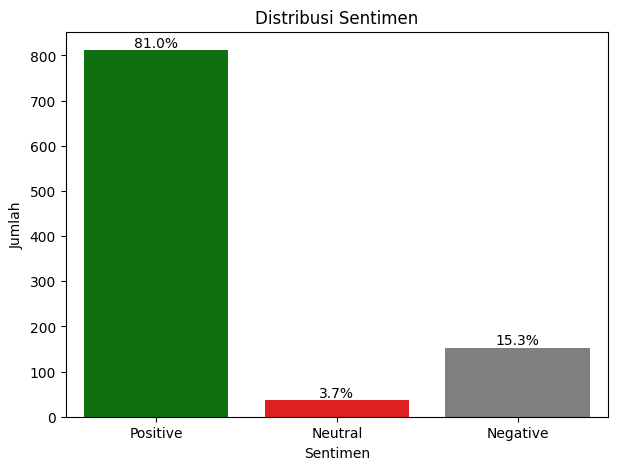

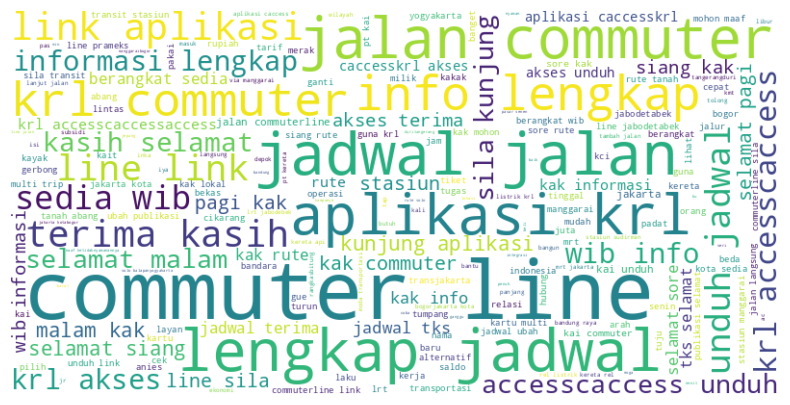

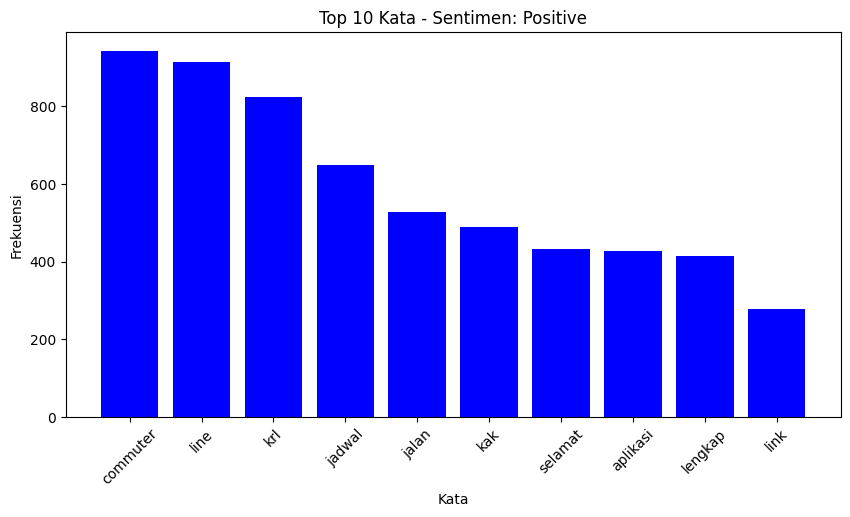

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from collections import Counter
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.units import inch
import tempfile
import pandas as pd
import datetime

# Fungsi untuk menerjemahkan tanggal ke format Indonesia
def translate_to_indonesian(date_obj):
    days = {
        "Monday": "Senin",
        "Tuesday": "Selasa",
        "Wednesday": "Rabu",
        "Thursday": "Kamis",
        "Friday": "Jumat",
        "Saturday": "Sabtu",
        "Sunday": "Minggu"
    }

    months = {
        "January": "Januari",
        "February": "Februari",
        "March": "Maret",
        "April": "April",
        "May": "Mei",
        "June": "Juni",
        "July": "Juli",
        "August": "Agustus",
        "September": "September",
        "October": "Oktober",
        "November": "November",
        "December": "Desember"
    }

    day_name = days[date_obj.strftime("%A")]
    day = date_obj.strftime("%d")
    month_name = months[date_obj.strftime("%B")]
    year = date_obj.strftime("%Y")

    return f"{day_name} {day} - {month_name} - {year}"

# Fungsi untuk membuat word cloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig('wordcloud.png')
    plt.show()

# Fungsi untuk plot distribusi sentimen
def plot_sentiment_distribution(df):
    sentiment_counts = df['Sentiments'].value_counts()
    plt.figure(figsize=(7, 5))
    g = sns.countplot(x='Sentiments', data=df, palette=['green', 'red', 'gray'])

    ax = g.axes
    for p in ax.patches:
        ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 5),
                    textcoords='offset points')
    plt.title('Distribusi Sentimen')
    plt.xlabel('Sentimen')
    plt.ylabel('Jumlah')
    plt.savefig('sentiment_distribution.png')
    plt.show()

# Fungsi untuk plot frekuensi kata
def plot_word_frequency(df, sentiment, top_n):
    sentiment_words = df[df['Sentiments'] == sentiment]['Tweet Setelah Preprocessing'].str.cat(sep=' ')
    word_counts = Counter(sentiment_words.split())
    top_words = dict(word_counts.most_common(top_n))  # Menggunakan jumlah kata teratas yang dipilih

    plt.figure(figsize=(10, 5))
    plt.bar(top_words.keys(), top_words.values(), color='blue')
    plt.title(f'Top {top_n} Kata - Sentimen: {sentiment}')
    plt.xlabel('Kata')
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.savefig('word_frequency.png')
    plt.show()

# Fungsi untuk menyimpan DataFrame ke file CSV
def save_to_csv(df):
    df.to_csv("Hasil Sentimen.csv", encoding='utf8', index=False)
    print("Data telah disimpan ke Hasil Sentimen.csv")

# Fungsi untuk generate dan download PDF report
def generate_pdf_report():
    # Create a temporary file for the PDF
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix=".pdf")
    pdf_path = temp_file.name

    # Create a PDF with reportlab
    c = canvas.Canvas(pdf_path, pagesize=letter)
    width, height = letter

    # Add title
    c.setFont("Helvetica-Bold", 16)
    c.drawString(1 * inch, height - 1 * inch, "Laporan Analisis Tweet")

    # Add visualizations
    c.setFont("Helvetica", 12)
    c.drawString(1 * inch, height - 2 * inch, "Word Cloud")
    wordcloud_img = "wordcloud.png"
    c.drawImage(wordcloud_img, 1 * inch, height - 3 * inch, width=5 * inch, height=3 * inch)

    c.drawString(1 * inch, height - 6 * inch, "Distribusi Panjang Tweet")
    length_dist_img = "sentiment_distribution.png"
    c.drawImage(length_dist_img, 1 * inch, height - 7 * inch, width=5 * inch, height=3 * inch)

    c.drawString(1 * inch, height - 10 * inch, "20 Kata Teratas")
    top_words_img = "word_frequency.png"
    c.drawImage(top_words_img, 1 * inch, height - 11 * inch, width=5 * inch, height=3 * inch)

    c.save()

    # Download the PDF
    from google.colab import files
    files.download(pdf_path)

# Widget dropdown untuk sentimen
sentiment_dropdown = widgets.Dropdown(
    options=df['Sentiments'].unique(),
    value=df['Sentiments'].iloc[0],
    description='Sentimen:',
)

# Widget dropdown untuk jumlah kata teratas
top_words_dropdown = widgets.Dropdown(
    options=[5, 10, 15, 20],  # Ubah atau tambahkan opsi sesuai kebutuhan
    value=10,
    description='Top Kata:',
)

# Fungsi untuk memperbarui semua plot berdasarkan dropdown
def update_plots(sentiment, top_n):
    filtered_text = ' '.join(df[df['Sentiments'] == sentiment]['Tweet Setelah Preprocessing'])
    generate_wordcloud(filtered_text)
    plot_word_frequency(df, sentiment, top_n)

# Fungsi event handler untuk dropdown sentimen
def sentiment_dropdown_eventhandler(change):
    update_plots(change.new, top_words_dropdown.value)

# Fungsi event handler untuk dropdown top kata
def top_words_dropdown_eventhandler(change):
    update_plots(sentiment_dropdown.value, change.new)

# Fungsi event handler untuk tombol simpan CSV
def save_csv_eventhandler(_):
    save_to_csv(df)

# Fungsi event handler untuk tombol plot distribusi sentimen
def plot_sentiment_eventhandler(_):
    plot_sentiment_distribution(df)

# Fungsi event handler untuk tombol download PDF
def download_pdf_eventhandler(_):
    generate_pdf_report()

# Memasang event handler ke dropdown sentimen dan dropdown top kata
sentiment_dropdown.observe(sentiment_dropdown_eventhandler, names='value')
top_words_dropdown.observe(top_words_dropdown_eventhandler, names='value')

# Membuat tombol untuk menyimpan CSV
save_csv_button = widgets.Button(description="Simpan ke CSV")
save_csv_button.on_click(save_csv_eventhandler)

# Membuat tombol untuk plot distribusi sentimen
plot_sentiment_button = widgets.Button(description="Plot Distribusi")
plot_sentiment_button.on_click(plot_sentiment_eventhandler)

# Membuat tombol untuk download PDF
download_pdf_button = widgets.Button(description="Unduh Laporan PDF")
download_pdf_button.on_click(download_pdf_eventhandler)

# Buat header dan footer dengan format tanggal Indonesia
current_date = translate_to_indonesian(datetime.datetime.now())

header = widgets.HTML(value="<h1 style='text-align:center;'>LAPORAN</h1>")
footer = widgets.HTML(value="<footer style='text-align:end'><h2>Adrian Nathanael Kalalo - {}</h2></footer>".format(current_date))

# Menampilkan widget dropdown dan tombol
dashboard = widgets.VBox([
    header,
    sentiment_dropdown,
    top_words_dropdown,
    save_csv_button,
    plot_sentiment_button,
    download_pdf_button,
    footer
])

display(dashboard)

# Plot distribusi sentimen
plot_sentiment_distribution(df)

# Plot awal untuk kata teratas default
update_plots(sentiment_dropdown.value, top_words_dropdown.value)


## Simpan Hasil

In [ ]:
df.to_csv("Hasil Sentimen.csv",encoding='utf8', index=False)
import pandas as pd
import numpy as np

df = pd.read_csv("Hasil Sentimen.csv")

df

,Tweet Setelah Preprocessing,Compound Score,Sentiments
0,selamat pagi kak informasi rangkai peron stasi...,10,Positive
1,xx selamat pagi kak kece posisi kereta aplikas...,10,Positive
2,selamat pagi kak informasi jalan commuterline ...,8,Positive
3,orkay kelas pagi cepat ac express tanah abang ...,8,Positive
4,jakarta krl commuter line krlnya pasang ac,7,Positive
...,...,...,...
997,selamat pagi kak informasi stasiun tuju inform...,21,Positive
998,selamat malam kak commuter line manggaraibogor...,6,Positive
999,selamat malam kak commuter line jakarta kotabo...,6,Positive
1000,selamat malam kak commuter line jatinegarapasa...,2,Positive




**MODDELING**

**Membaca Dataset**

---



In [ ]:

import pandas as pd

def load_data():
    data = pd.read_csv('Hasil Sentimen.csv')
    return data


**Menampilkan Informasi Dataset**

---



In [ ]:
data = load_data()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Tweet Setelah Preprocessing  1002 non-null   object
 1   Compound Score               1002 non-null   int64 
 2   Sentiments                   1002 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


# ***ALGORITMA NAIVE BAYES CLASSIFIER***

## Latih model Naive Bayes menggunakan Multinomial Naive Bayes

---



Dropdown(description='Test Ratio:', options=(0.1, 0.2, 0.3), value=0.1)

Button(description='Evaluasi Model', style=ButtonStyle())

Button(description='KFold Cross Validation', style=ButtonStyle())

Button(description='Unduh Laporan PDF', style=ButtonStyle())

Menggunakan test_ratio = 0.1
Jumlah Data Latih: 901
Jumlah Data Uji: 101
Akurasi pada data Latih: 0.8635

Classification Report (Data Latih):
               precision    recall  f1-score   support

    Negative       0.71      0.89      0.79       136
     Neutral       0.33      1.00      0.50        34
    Positive       0.99      0.85      0.92       731

    accuracy                           0.86       901
   macro avg       0.68      0.91      0.74       901
weighted avg       0.92      0.86      0.88       901

Confusion Matrix (Data Latih):
[[121  10   5]
 [  0  34   0]
 [ 50  58 623]]


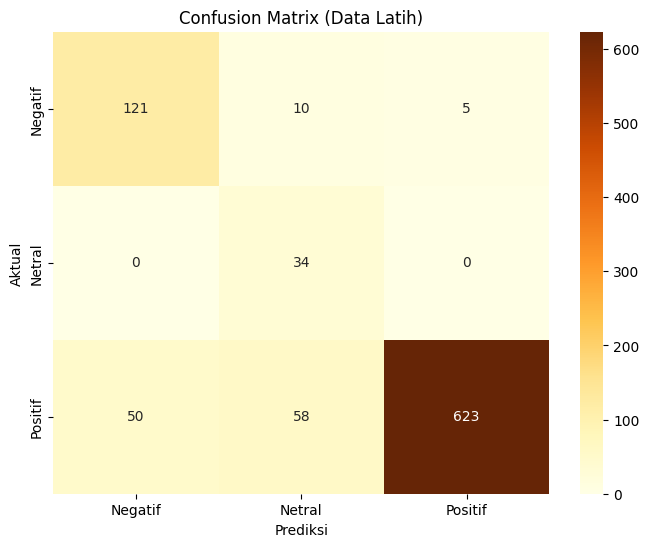


Akurasi pada data Uji: 0.7129

Classification Report (Data Uji):
               precision    recall  f1-score   support

    Negative       0.42      0.65      0.51        17
     Neutral       0.20      1.00      0.33         3
    Positive       0.97      0.72      0.82        81

    accuracy                           0.71       101
   macro avg       0.53      0.79      0.56       101
weighted avg       0.85      0.71      0.76       101

Confusion Matrix (Data Uji):
[[11  4  2]
 [ 0  3  0]
 [15  8 58]]


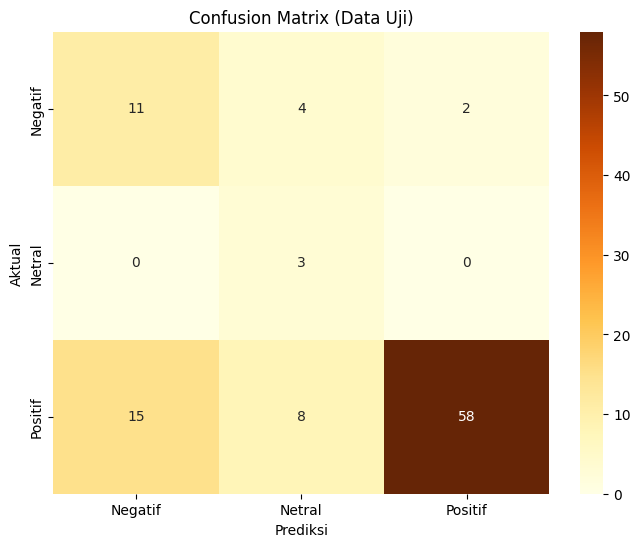

Fold 1 Accuracy: 0.6931
Classification Report for Fold 1:
               precision    recall  f1-score   support

    Negative       0.41      0.71      0.52        17
     Neutral       0.20      1.00      0.33         3
    Positive       0.96      0.68      0.80        81

    accuracy                           0.69       101
   macro avg       0.53      0.79      0.55       101
weighted avg       0.85      0.69      0.74       101



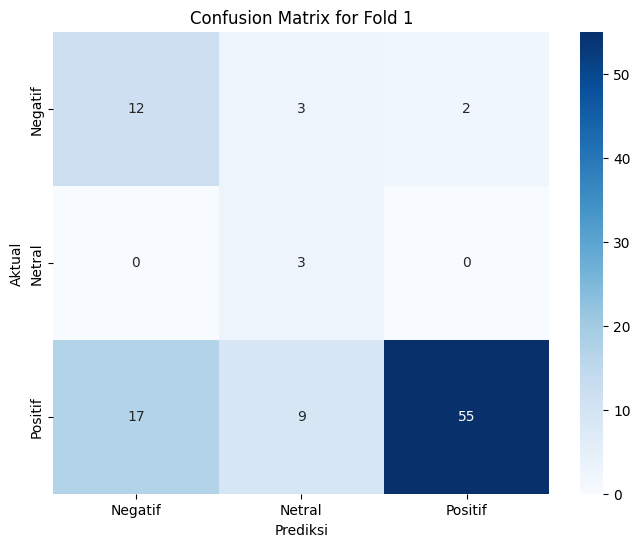

Fold 2 Accuracy: 0.7030
Classification Report for Fold 2:
               precision    recall  f1-score   support

    Negative       0.48      0.62      0.54        16
     Neutral       0.21      0.50      0.30         8
    Positive       0.93      0.74      0.83        77

    accuracy                           0.70       101
   macro avg       0.54      0.62      0.55       101
weighted avg       0.80      0.70      0.74       101



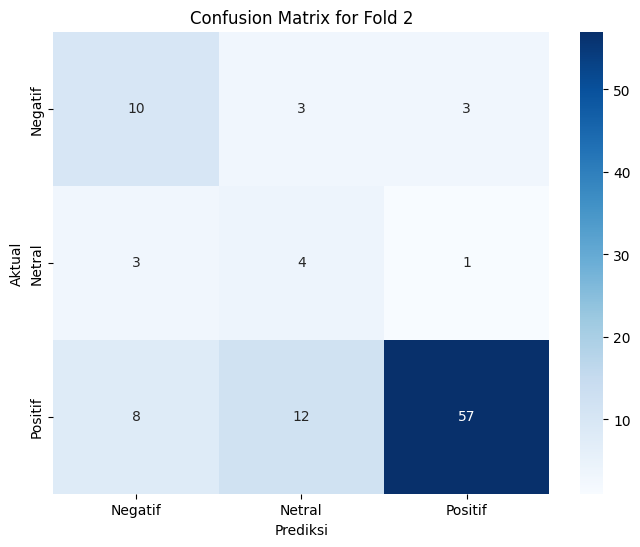

Fold 3 Accuracy: 0.6600
Classification Report for Fold 3:
               precision    recall  f1-score   support

    Negative       0.43      0.72      0.54        18
     Neutral       0.19      0.60      0.29         5
    Positive       0.93      0.65      0.76        77

    accuracy                           0.66       100
   macro avg       0.52      0.66      0.53       100
weighted avg       0.80      0.66      0.70       100



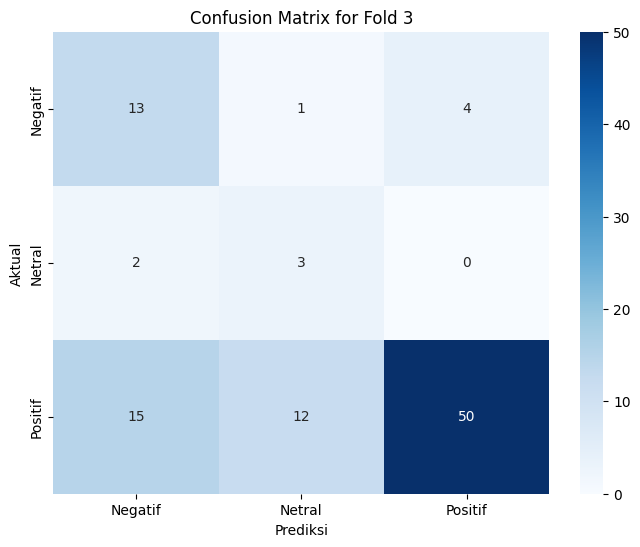

Fold 4 Accuracy: 0.7200
Classification Report for Fold 4:
               precision    recall  f1-score   support

    Negative       0.52      0.82      0.64        17
     Neutral       0.00      0.00      0.00         1
    Positive       0.94      0.71      0.81        82

    accuracy                           0.72       100
   macro avg       0.48      0.51      0.48       100
weighted avg       0.86      0.72      0.77       100



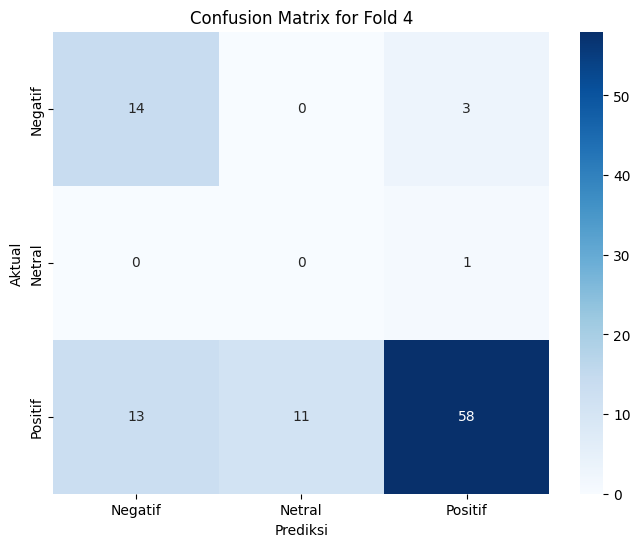

Fold 5 Accuracy: 0.6200
Classification Report for Fold 5:
               precision    recall  f1-score   support

    Negative       0.27      0.60      0.37        10
     Neutral       0.16      0.38      0.22         8
    Positive       0.90      0.65      0.75        82

    accuracy                           0.62       100
   macro avg       0.44      0.54      0.45       100
weighted avg       0.78      0.62      0.67       100



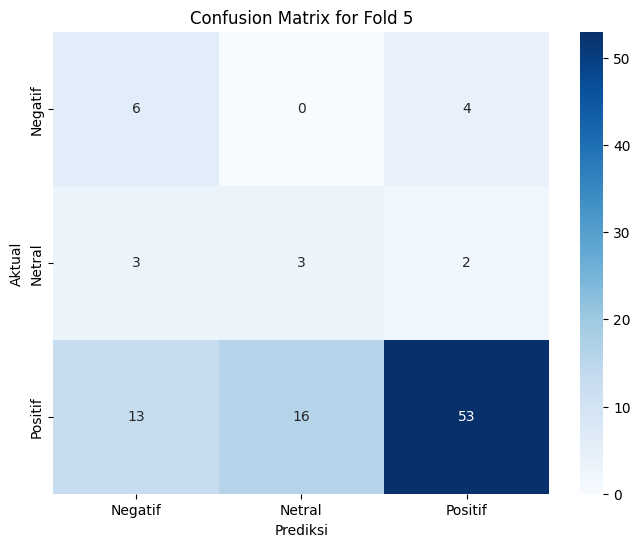

Fold 6 Accuracy: 0.7300
Classification Report for Fold 6:
               precision    recall  f1-score   support

    Negative       0.35      0.64      0.45        11
     Neutral       0.00      0.00      0.00         2
    Positive       0.96      0.76      0.85        87

    accuracy                           0.73       100
   macro avg       0.44      0.46      0.43       100
weighted avg       0.87      0.73      0.79       100



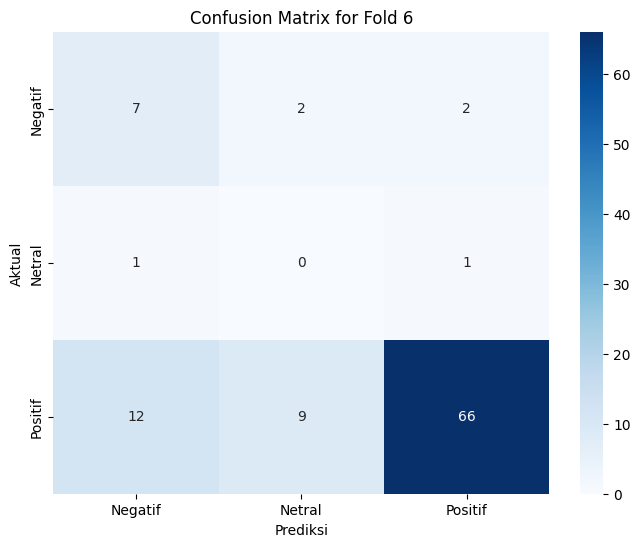

Fold 7 Accuracy: 0.7200
Classification Report for Fold 7:
               precision    recall  f1-score   support

    Negative       0.48      0.78      0.60        18
     Neutral       0.17      0.50      0.25         4
    Positive       0.95      0.72      0.82        78

    accuracy                           0.72       100
   macro avg       0.53      0.67      0.55       100
weighted avg       0.83      0.72      0.75       100



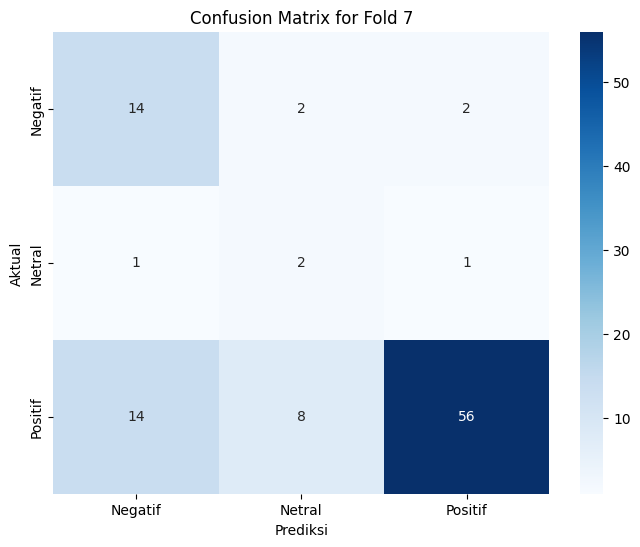

Fold 8 Accuracy: 0.7000
Classification Report for Fold 8:
               precision    recall  f1-score   support

    Negative       0.54      0.72      0.62        18
     Neutral       0.11      1.00      0.20         2
    Positive       0.95      0.69      0.80        80

    accuracy                           0.70       100
   macro avg       0.53      0.80      0.54       100
weighted avg       0.86      0.70      0.75       100



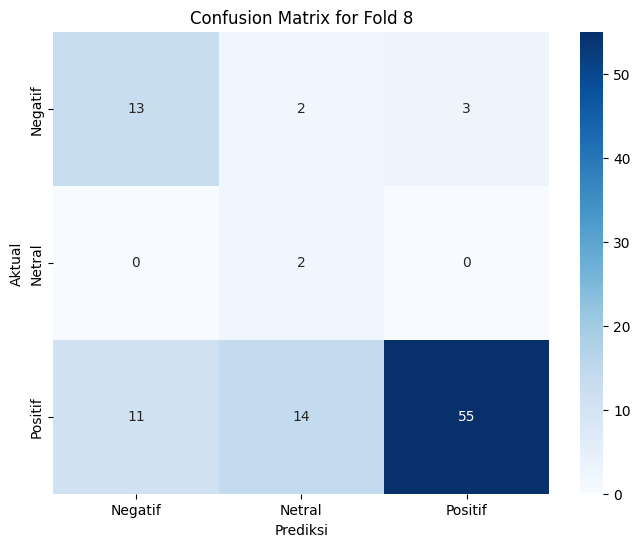

Fold 9 Accuracy: 0.6700
Classification Report for Fold 9:
               precision    recall  f1-score   support

    Negative       0.28      0.70      0.40        10
     Neutral       0.07      0.33      0.12         3
    Positive       0.97      0.68      0.80        87

    accuracy                           0.67       100
   macro avg       0.44      0.57      0.44       100
weighted avg       0.87      0.67      0.74       100



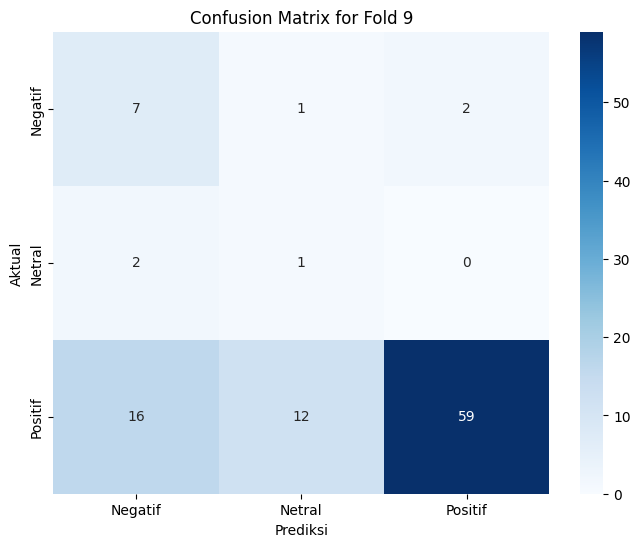

Fold 10 Accuracy: 0.6700
Classification Report for Fold 10:
               precision    recall  f1-score   support

    Negative       0.48      0.89      0.63        18
     Neutral       0.00      0.00      0.00         1
    Positive       0.98      0.63      0.77        81

    accuracy                           0.67       100
   macro avg       0.49      0.51      0.46       100
weighted avg       0.88      0.67      0.73       100



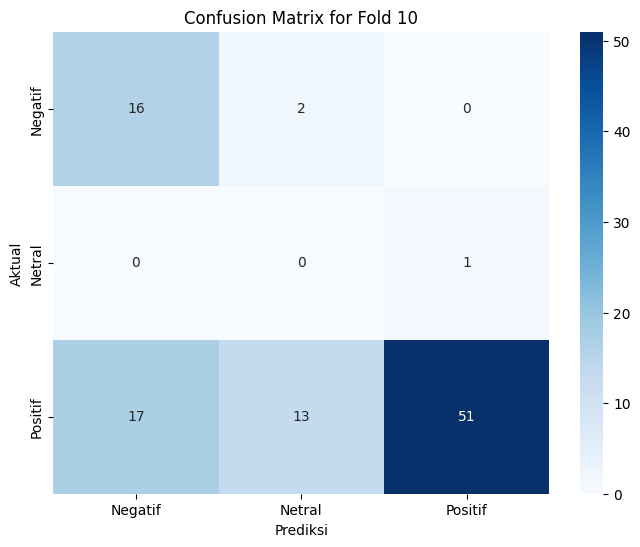


Mean Cross-Validation Accuracy: 0.69
Standard Deviation of Cross-Validation Accuracy: 0.03


In [ ]:
df_cleaned = pd.DataFrame(data)
!pip install reportlab
!pip install scikit-learn
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.units import inch
import tempfile
import os
from google.colab import files

# Fungsi untuk mengevaluasi model dengan rasio tertentu
def evaluate_model_with_ratio(X, y, test_ratio):
    # Bagi data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)

    print(f'Jumlah Data Latih: {len(X_train)}')
    print(f'Jumlah Data Uji: {len(X_test)}')

    # Inisialisasi TF-IDF Vectorizer
    vectorizer = TfidfVectorizer()

    # Transformasi data teks menjadi vektor Count Vectorizer
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Resampling menggunakan SMOTE
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

    # Inisialisasi model Naive Bayes
    nb_model = MultinomialNB()
    nb_model.fit(X_train_resampled, y_train_resampled)

    # Prediksi pada data Latih dan data uji
    y_train_pred = nb_model.predict(X_train_tfidf)
    y_test_pred = nb_model.predict(X_test_tfidf)

    # Evaluasi Model menggunakan data latih
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f'Akurasi pada data Latih: {train_accuracy:.4f}')

    # Output classification report
    print('\nClassification Report (Data Latih):\n', classification_report(y_train, y_train_pred, zero_division=1))

    # Menghitung confusion matrix (Data Latih)
    conf_matrix_train = confusion_matrix(y_train, y_train_pred)

    # Print matriks kebingungan (Data Latih)
    print("Confusion Matrix (Data Latih):")
    print(conf_matrix_train)

    # Plot confusion matrix (Data Latih)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='YlOrBr', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
    plt.title('Confusion Matrix (Data Latih)')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.savefig("confusion_matrix_train.png")
    plt.show()

    # Evaluasi Model menggunakan data uji
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'\nAkurasi pada data Uji: {test_accuracy:.4f}')

    # Output classification report (Data Uji)
    print('\nClassification Report (Data Uji):\n', classification_report(y_test, y_test_pred, zero_division=1))

    # Menghitung confusion matrix (Data Uji)
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)

    # Print matriks kebingungan (Data Uji)
    print("Confusion Matrix (Data Uji):")
    print(conf_matrix_test)

    # Plot confusion matrix (Data Uji)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='YlOrBr', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
    plt.title('Confusion Matrix (Data Uji)')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.savefig("confusion_matrix_test.png")
    plt.show()

# Fungsi untuk melakukan KFold Cross Validation
def run_kfold_cross_validation(X, y):
    # Konversi y_train ke array numpy
    y_train_array = y.to_numpy()

    # Inisialisasi KFold dengan 10 folds
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    # Inisialisasi Naive Bayes model
    nb_model = MultinomialNB()

    # Inisialisasi TF-IDF Vectorizer
    vectorizer = TfidfVectorizer()

    fold = 1
    accuracy_scores = []

    for train_index, test_index in kf.split(X):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y_train_array[train_index], y_train_array[test_index]

        # Transformasi data teks menjadi vektor TF-IDF
        X_train_fold_tfidf = vectorizer.fit_transform(X_train_fold)
        X_test_fold_tfidf = vectorizer.transform(X_test_fold)

        # Menggunakan SMOTE untuk menyeimbangkan data latih di setiap fold
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold_tfidf, y_train_fold)

        # Latih model pada fold saat ini
        nb_model.fit(X_train_resampled, y_train_resampled)

        # Prediksi pada data test fold saat ini
        predictions_fold = nb_model.predict(X_test_fold_tfidf)

        # Akurasi
        accuracy_fold = accuracy_score(y_test_fold, predictions_fold)
        accuracy_scores.append(accuracy_fold)
        print(f'Fold {fold} Accuracy: {accuracy_fold:.4f}')

        # Report klasifikasi
        print(f'Classification Report for Fold {fold}:\n', classification_report(y_test_fold, predictions_fold))

        # Confusion matrix
        conf_matrix_fold = confusion_matrix(y_test_fold, predictions_fold)

        # Plot confusion matrix untuk fold saat ini
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix_fold, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
        plt.title(f'Confusion Matrix for Fold {fold}')
        plt.xlabel('Prediksi')
        plt.ylabel('Aktual')
        plt.savefig(f"confusion_matrix_fold_{fold}.png")
        plt.show()

        fold += 1

    # Tampilkan hasil rata-rata dari semua folds
    mean_accuracy = np.mean(accuracy_scores)
    std_accuracy = np.std(accuracy_scores)
    print(f'\nMean Cross-Validation Accuracy: {mean_accuracy:.2f}')
    print(f'Standard Deviation of Cross-Validation Accuracy: {std_accuracy:.2f}')


# Fungsi untuk membuat laporan PDF
def generate_pdf_report():
    # Ganti nama file PDF sesuai kebutuhan
    pdf_filename = "Laporan_Analisis_Sentimen_Tweet.pdf"

    # Create a temporary file for the PDF
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix=".pdf", mode='wb')
    pdf_path = temp_file.name

    # Create a PDF with reportlab
    c = canvas.Canvas(pdf_path, pagesize=letter)
    width, height = letter

    # Add title
    c.setFont("Helvetica-Bold", 16)
    c.drawString(1 * inch, height - 1 * inch, "Laporan Analisis Tweet")

    # Add visualizations with resized images
    c.setFont("Helvetica", 12)
    c.drawString(1 * inch, height - 2 * inch, "Confusion Matrix (Data Latih)")
    train_conf_matrix_img = "confusion_matrix_train.png"
    if os.path.isfile(train_conf_matrix_img):
        c.drawImage(train_conf_matrix_img, 1 * inch, height - 5 * inch, width=4 * inch, height=2.5 * inch)  # Resize image
    else:
        print(f"File gambar {train_conf_matrix_img} tidak ditemukan.")

    c.drawString(1 * inch, height - 8 * inch, "Confusion Matrix (Data Uji)")
    test_conf_matrix_img = "confusion_matrix_test.png"
    if os.path.isfile(test_conf_matrix_img):
        c.drawImage(test_conf_matrix_img, 1 * inch, height - 11 * inch, width=4 * inch, height=2.5 * inch)  # Resize image
    else:
        print(f"File gambar {test_conf_matrix_img} tidak ditemukan.")

    c.save()

    # Rename the temporary file to the desired filename
    import shutil
    shutil.move(pdf_path, pdf_filename)

    # Download the PDF
    files.download(pdf_filename)

# Data contoh (ganti dengan data Anda)
X = df_cleaned['Tweet Setelah Preprocessing']
y = df_cleaned['Sentiments']

# Dropdown widget untuk memilih rasio
ratio_dropdown = widgets.Dropdown(
    options=[0.1, 0.2, 0.3],  # Rasio test_size yang tersedia
    value=0.1,  # Nilai default
    description='Test Ratio:',
    disabled=False,
)

# Button untuk mengevaluasi model
evaluate_button = widgets.Button(description="Evaluasi Model")

# Button untuk menjalankan KFold Cross Validation
kfold_button = widgets.Button(description="KFold Cross Validation")

# Button untuk mengunduh PDF laporan
download_pdf_button = widgets.Button(description="Unduh Laporan PDF")

# Fungsi penanganan klik tombol evaluasi
def on_evaluate_button_clicked(b):
    test_ratio = ratio_dropdown.value
    print(f'Menggunakan test_ratio = {test_ratio}')
    evaluate_model_with_ratio(X, y, test_ratio)

# Fungsi penanganan klik tombol KFold Cross Validation
def on_kfold_button_clicked(b):
    run_kfold_cross_validation(X, y)

# Fungsi penanganan klik tombol unduh laporan PDF
def on_download_pdf_button_clicked(b):
    generate_pdf_report()

# Menghubungkan klik tombol dengan fungsi yang sesuai
evaluate_button.on_click(on_evaluate_button_clicked)
kfold_button.on_click(on_kfold_button_clicked)
download_pdf_button.on_click(on_download_pdf_button_clicked)

# Menampilkan widget
display(ratio_dropdown, evaluate_button, kfold_button, download_pdf_button)


# ***ALGORITMA Support Vector Machine (SVM)***

Dropdown(description='Split Ratio:', index=1, options=(('90:10', 0.1), ('80:20', 0.2), ('70:30', 0.3)), value=…

Dropdown(description='Kernel:', options=(('Linear C=1', {'kernel': 'linear', 'C': 1}), ('RBF C=100 Gamma=0.01'…

Button(description='Run Model', style=ButtonStyle())

Button(description='Run 10-KFold', style=ButtonStyle())

Button(description='Download PDF', style=ButtonStyle())

Jumlah Data Latih: 801
Jumlah Data Uji: 201
Akurasi pada data uji: 0.8507

Classification Report:
               precision    recall  f1-score   support

    Negative       0.80      0.48      0.60        33
     Neutral       0.43      0.27      0.33        11
    Positive       0.87      0.97      0.92       157

    accuracy                           0.85       201
   macro avg       0.70      0.58      0.62       201
weighted avg       0.84      0.85      0.83       201


Confusion Matrix:
[[ 16   1  16]
 [  2   3   6]
 [  2   3 152]]


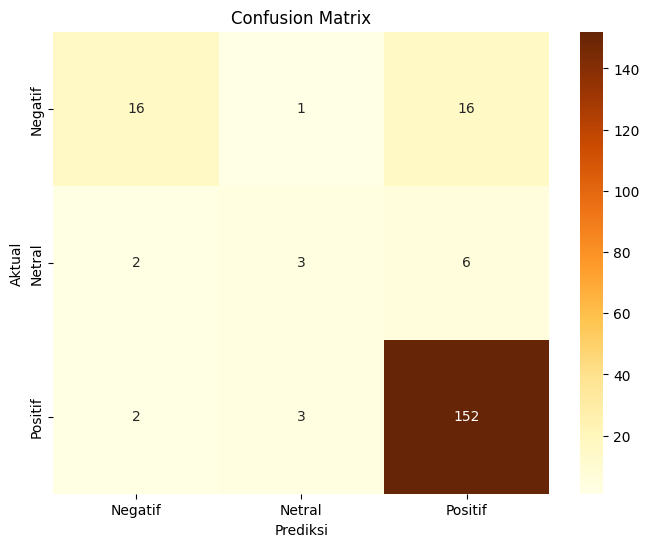

In [ ]:
!pip install reportlab
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.units import inch
import tempfile
import os
from google.colab import files
from datetime import datetime

# Global variables to store the split ratio and kernel parameters
current_split_ratio = None
current_kernel_params = None

# DataFrame (Assuming df_cleaned is already defined)
X = df_cleaned['Tweet Setelah Preprocessing']
y = df_cleaned['Sentiments']

# Dropdown untuk memilih rasio data train dan test
split_ratio_dropdown = widgets.Dropdown(
    options=[('90:10', 0.1), ('80:20', 0.2), ('70:30', 0.3)],
    value=0.2,
    description='Split Ratio:'
)

# Dropdown untuk memilih kernel SVM
kernel_dropdown = widgets.Dropdown(
    options=[('Linear C=1', {'kernel': 'linear', 'C': 1}),
             ('RBF C=100 Gamma=0.01', {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}),
             ('Poly C=10 Degree=1', {'kernel': 'poly', 'C': 10, 'degree': 1})],
    value={'kernel': 'linear', 'C': 1},
    description='Kernel:'
)

# Global variables to be used in the kfold function
X_train_tfidf = None
y_train_array = None
svm_model = None

# Fungsi untuk menjalankan model berdasarkan pilihan pengguna
def run_model(split_ratio, kernel_params):
    global X_train_tfidf, y_train_array, svm_model, y_test, y_test_pred
    global current_split_ratio, current_kernel_params  # Store split ratio and kernel parameters

    # Update global variables with the current settings
    current_split_ratio = split_ratio
    current_kernel_params = kernel_params

    # Bagi data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=42)

    print(f'Jumlah Data Latih: {len(X_train)}')
    print(f'Jumlah Data Uji: {len(X_test)}')

    # Inisialisasi TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Transformasi data teks menjadi vektor TF-IDF
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    # Inisialisasi MaxAbsScaler
    scaler = MaxAbsScaler()

    # Transformasi vektor TF-IDF menggunakan MaxAbsScaler
    X_train_tfidf = scaler.fit_transform(X_train_tfidf)
    X_test_tfidf = scaler.transform(X_test_tfidf)

    # Inisialisasi SVM dengan kernel yang dipilih
    svm_model = SVC(**kernel_params, random_state=42)

    # Latih model menggunakan data pelatihan yang sudah di-transformasi
    svm_model.fit(X_train_tfidf, y_train)

    # Prediksi pada data Latih dan data uji
    y_train_pred = svm_model.predict(X_train_tfidf)
    y_test_pred = svm_model.predict(X_test_tfidf)

    # Evaluasi performa model data uji
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'Akurasi pada data uji: {test_accuracy:.4f}')

    # Output classification report
    print('\nClassification Report:\n', classification_report(y_test, y_test_pred))

    # Menghitung confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Cetak confusion matrix
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
    plt.title('Confusion Matrix')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.savefig('conf_matrix.png')
    plt.show()

    # Konversi y_train ke array numpy
    y_train_array = y_train.to_numpy()

def run_kfold():
    global svm_model, X_train_tfidf, y_train_array  # Declare svm_model and other variables as global

    # Check if X_train_tfidf and y_train_array are not None
    if X_train_tfidf is None or y_train_array is None:
        print("Error: Model must be run before KFold.")
        return

    # Inisialisasi KFold dengan 10 folds
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    fold = 1
    accuracy_scores = []

    for train_index, test_index in kf.split(X_train_tfidf):
        X_train_fold, X_test_fold = X_train_tfidf[train_index], X_train_tfidf[test_index]
        y_train_fold, y_test_fold = y_train_array[train_index], y_train_array[test_index]

        # Latih model pada fold saat ini
        svm_model.fit(X_train_fold, y_train_fold)

        # Prediksi pada data test fold saat ini
        predictions_fold = svm_model.predict(X_test_fold)

        # Akurasi
        accuracy_fold = accuracy_score(y_test_fold, predictions_fold)
        accuracy_scores.append(accuracy_fold)
        print(f'Fold {fold} Accuracy: {accuracy_fold:.4f}')

        # Report klasifikasi
        print(f'Classification Report for Fold {fold}:\n', classification_report(y_test_fold, predictions_fold))

        # Confusion matrix
        conf_matrix_fold = confusion_matrix(y_test_fold, predictions_fold)

        # Plot confusion matrix untuk fold saat ini
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix_fold, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
        plt.title(f'Confusion Matrix for Fold {fold}')
        plt.xlabel('Prediksi')
        plt.ylabel('Aktual')
        plt.show()

        fold += 1

    # Tampilkan hasil rata-rata dari semua folds
    mean_accuracy = np.mean(accuracy_scores)
    std_accuracy = np.std(accuracy_scores)
    print(f'\nMean Cross-Validation Accuracy: {mean_accuracy:.2f}')
    print(f'Standard Deviation of Cross-Validation Accuracy: {std_accuracy:.2f}')


# Fungsi untuk membuat laporan PDF
def generate_pdf_report():
    # Ganti nama file PDF sesuai kebutuhan
    pdf_filename = "Laporan_Analisis_Sentimen_SVM.pdf"

    # Create a temporary file for the PDF
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix=".pdf", mode='wb')
    pdf_path = temp_file.name

    # Create a PDF with reportlab
    c = canvas.Canvas(pdf_path, pagesize=letter)
    width, height = letter

    # Add header with name and date
    c.setFont("Helvetica-Bold", 8)
    header_text = f"Adrian Nathanael Kalalo "
    c.drawString(1 * inch, height - 0.5 * inch, header_text)

    # Add title
    c.setFont("Helvetica-Bold", 16)
    c.drawString(1 * inch, height - 1.5 * inch, "Laporan Hasil Model SVM")

    # Add split ratio and kernel parameters
    c.setFont("Helvetica", 10)
    split_ratio_text = f"Split Ratio: {current_split_ratio*100}%"
    kernel_text = f"Kernel: {current_kernel_params}"
    c.drawString(1 * inch, height - 2.5 * inch, split_ratio_text)
    c.drawString(1 * inch, height - 2 * inch, kernel_text)

    # Add visualizations with resized images
    c.setFont("Helvetica", 12)
    c.drawString(1 * inch, height - 4.5 * inch, "Confusion Matrix")
    img = "conf_matrix.png"
    c.drawImage(img, 1 * inch, height - 7.5 * inch, width=7 * inch, height=5 * inch)  # Resize image

    c.save()

    # Rename the temporary file to the desired filename
    import shutil
    shutil.move(pdf_path, pdf_filename)

    # Download the PDF
    files.download(pdf_filename)

# Display widgets and button
def on_button_clicked(b):
    run_model(split_ratio_dropdown.value, kernel_dropdown.value)

def on_kfold_button_clicked(b):
    run_kfold()

def on_download_button_clicked(b):
    generate_pdf_report()

button = widgets.Button(description="Run Model")
button.on_click(on_button_clicked)

kfold_button = widgets.Button(description="Run 10-KFold")
kfold_button.on_click(on_kfold_button_clicked)

download_button = widgets.Button(description="Download PDF")
download_button.on_click(on_download_button_clicked)

display(split_ratio_dropdown, kernel_dropdown, button, kfold_button, download_button)
